# Dummy prediction

Apziva project #5: ValueInvestor<br>
2023 09 04

__Summary:__
* This notebook uses simply the mean differences to predict the development of the price.
* Details:
    * Raw data converted to log data
    * Differencing on this log data
    * Calculating mean difference on training data.
    * Adding this mean difference constantly to the last training value.
    * Plotting both true and predicted prices on the non-log scale.
* The prediction results in a monotonically increasing function.
* The prediction is rough, but points into the right direction.

## TOC: <a class="anchor" id="TOC"></a>
* [Utilities](#Utilities)
* [Installation](#Installation)
* [Use mean differences to predict](#UseMeanDifferencesToPredict)

## Utilities <a class="anchor" id="Utilities"></a>
[TOC](#TOC)

In [1]:
# own libraries
import Utilities as u
import MachineLearning as ml

# activate changes in libraries
import importlib
importlib.reload(u)
importlib.reload(ml)

# aliases
from Utilities import TypeChecker as t
from Utilities import PrintAlias as p

def CheckNewYear(dfrSource):
    '''
    Checks a dateframe for the days between 2022 and 2023
    When       Who What
    2023 09 08 dh  Created
    '''
    p("Check new year 2022/2023:")
    strStartDate = '2022-12-24'
    strEndDate   = '2023-01-06'
    dfrFiltered = dfrSource[(dfrSource['Date'] >= strStartDate) \
                                  & (dfrSource['Date'] <= strEndDate)]
    u.DisplayDataFrame(dfrFiltered)

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

def RMSE(srs1,srs2):
    squared_error = (srs1 - srs2) ** 2
    mean_squared_error = np.mean(squared_error)
    fltRMSE = np.sqrt(mean_squared_error)
    return fltRMSE

def PlotTimeSeries(dfr, lstrColumns):
    '''
    Plots time series, separating training and test phase using a red line.
    When       Who What
    2023 09 21 dh  Created
    '''
    # init
    p("Microsoft stock market prices 2020 to 2023".upper())
    p("- The red line separates training data from test data.")
    p()
    astrColors = ["orange","black","gray","green","blue","red","purple"] * 10
    tstStartTest = pd.to_datetime('2023-01-01')
    
    for blnAll in [True,False]:
        
        # init
        p("• Training and test period:" if blnAll else "• Test period only:")
        plt.figure(figsize=(21, 5))
        
        # scatter plot    
        for intIndex,strColumn in enumerate(lstrColumns):
            
            # metric
            if strColumn=="Price":
                srsTrueValues = dfr[strColumn]
                strMetricToLabel = ""
            else:
                srsPredictedValues = dfr[strColumn]
                fltRMSE = RMSE(srsTrueValues,srsPredictedValues)
                strMetricToLabel = f" RMSE={round(fltRMSE,1)}"
            
            plt.plot(dfr['Date'], dfr[strColumn], color=astrColors[intIndex], marker='', linestyle='-', label=f"{strColumn}{strMetricToLabel}")

        # time range (timestamps)
        if blnAll:
            tstFirstDate = dfr['Date'].min()
        else:
            tstFirstDate = tstStartTest - timedelta(days=1)
        tstLastDate = dfr['Date'].max()

        # customize plot
        plt.xlim(tstFirstDate, tstLastDate)
        plt.grid(True)
        plt.xlabel('Date')
        plt.ylabel("Prices, true or predicted")
        plt.legend()

        # separator for training/test data
        #if blnAll or True:
        plt.axvline(x=tstStartTest, color='red', linestyle='--')

        # finalize
        plt.show()

## Installation <a class="anchor" id="Installation"></a>
[TOC](#TOC)

In [52]:
# installation
# pip install nothing so far

## Use mean differences to predict <a class="anchor" id="UseMeanDifferencesToPredict"></a>
[TOC](#TOC)

In [53]:
import pickle
import pandas as pd
strFilename = f"../data/processed/dfrThreeYears.p"
with open(strFilename, 'rb') as objBufferedWriter: # rb = read in binary mode
    dfrThreeYears = pickle.load(objBufferedWriter)
u.ShortDataFrameDisplay(dfrThreeYears)

DataFrame 'dfrThreeYears':


,Date,Price,Differences
12347,2020-01-01,153.010615,0.000000
12348,2020-01-02,154.205344,1.194729
...,...,...,...
13690,2023-09-05,331.274994,0.322970
13691,2023-09-06,333.130005,1.855011


In [61]:
# mean difference
dfrTrainingData = dfrThreeYears[dfrThreeYears['Date'] < '2023-01-01']
fltMeanDifference = dfrTrainingData['Differences'].mean()
p("Training data".upper())
p(f"- Days:            {len(dfrTrainingData)}")
p(f"- Years:           {round(len(dfrTrainingData)/365.25,3)}")
p(f"- Mean difference: {round(fltMeanDifference,3)} (different from last notebook, here training phase only)")
p()

# predict
dfrPredictionDummy = dfrThreeYears.copy()
lfltPredictions = []
for intRow, srsRow in dfrPredictionDummy.iterrows():
    fltCurrValue = srsRow['Price']
    if srsRow['Date'].year < 2023:
        fltCurrValue = srsRow['Price']
    else:
        fltCurrValue = fltLastValue + fltMeanDifference
    lfltPredictions.append(fltCurrValue)
    fltLastValue = fltCurrValue
dfrPredictionDummy['PredDummy'] =lfltPredictions
u.ToDisk(dfrPredictionDummy,strForcedName="dfrPredictionDummy",strType="processed")
CheckNewYear(dfrPredictionDummy)

TRAINING DATA
- Days:            1096
- Years:           3.001
- Mean difference: 0.078 (different from last notebook, here training phase only)

Check new year 2022/2023:


,Date,Price,Differences,PredDummy
13435,2022-12-24,235.912700,0.101744,235.912700
13436,2022-12-25,236.014488,0.101788,236.014488
13437,2022-12-26,236.116319,0.101831,236.116319
13438,2022-12-27,236.218194,0.101875,236.218194
13439,2022-12-28,234.112570,-2.105624,234.112570
13440,2022-12-29,236.714810,2.602240,236.714810
13441,2022-12-30,237.395157,0.680347,237.395157
13442,2022-12-31,237.967909,0.572752,237.967909
13443,2023-01-01,238.542043,0.574134,238.045425
13444,2023-01-02,239.117562,0.575519,238.122941


MICROSOFT STOCK MARKET PRICES 2020 TO 2023
- The red line separates training data from test data.

• Training and test period:


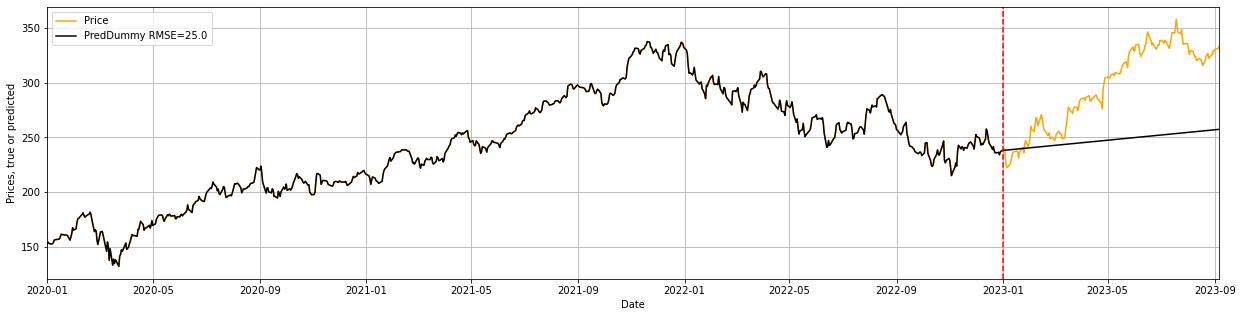

• Test period only:


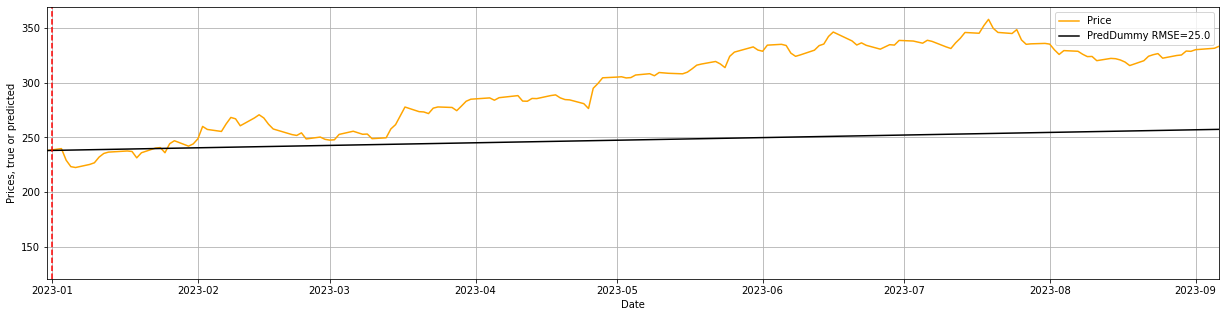

In [57]:
PlotTimeSeries(dfrPredictionDummy,["Price","PredDummy"])

__Observations__
* The prediction results in a __linearly increasing function__.
* The __prediction is rough__, but points into the right direction.
* Within this quarter 2023 Q1, it tends __not__ to be __steep enough__ when the entire quarter is considered.